### Problem Statement

 You have been provided with a dataset named **`"weather_data.csv"`**, which includes detailed records of various weather conditions. The dataset comprises the following columns:

- `hours_sunlight:` The total number of hours of sunlight received in a day.
- `humidity_level:` The humidity level as a percentage.
- `daily_temperature:` The temperature recorded at the end of the day in degrees Celsius.

Your task is to use this dataset to build a linear regression model to predict the daily temperature based on the hours of sunlight and humidity level. You will need to split the data into training and test sets, train the model, and evaluate its performance using appropriate metrics.

**Import Necessary Libraries**

In [35]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

model = LinearRegression()

### Task 1: Data Preparation and Exploration
1. Import the data from the `"weather_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset.

In [36]:

# Step 1: Import the data from the file and store it in a variable 'df'
df = pd.read_csv("datasets\\weather_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
df.head()

(49, 3)


,hours_sunlight,humidity_level,daily_temperature
0,10.5,65,22.3
1,9.2,70,21.0
2,7.8,80,18.5
3,6.4,90,17.2
4,8.1,75,19.4


In [37]:
# Step 4: Check for any missing values in the dataset
print(df.isnull().sum())
print(df.isna().sum())

hours_sunlight       0
humidity_level       0
daily_temperature    0
dtype: int64
hours_sunlight       0
humidity_level       0
daily_temperature    0
dtype: int64


### Task 2: Train a Linear Regression Model

1. Select the features (hours_sunlight, humidity_level) and the target variable (daily_temperature) for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Create a Linear Regression model and fit it using the training data.
4. Print the model's coefficients and intercept.

In [38]:
print(df.columns)
# Step 1: Select the features and target variable for modeling
features = ['hours_sunlight', 'humidity_level']
target = "daily_temperature"
X = df[features]
y = df[target]
# Step 2: Split the data into training and test sets with a test size of 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=997)


Index(['hours_sunlight', 'humidity_level', 'daily_temperature'], dtype='object')


In [39]:
# Step 3: Create a Linear Regression model and fit it using the training data
model.fit(X_train, y_train)

# Step 4: Print the model's coefficients and intercept
model.coef_, model.intercept_

(array([ 1.10353196, -0.054426  ]), 14.832722565355404)

### Task 3: Model Evaluation

1. Make predictions on the test set using the trained model.
2. Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics.
3. Print the MSE and R2 values.
4. Display the first few actual vs. predicted values for the daily temperature.

In [40]:
# Step 1: Make predictions on the test set using the trained modely_pred = model.predict(X_test)
y_pred = model.predict(X_test)





In [41]:
# Step 2: Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_test, y_pred)


In [42]:
# Step 3: Print the MSE and R2 values
print(f"MSE: {mse}\tr2: {r2}")

# Step 4: Display the first few actual vs. predicted values for the daily temperature
print(y_pred[:5])
print(y_test[:5])

MSE: 0.08501380441203943	r2: 0.9762960915129513
[21.39610275 23.48680873 20.07486677 20.57070556 19.68938118]
47    21.3
44    23.9
32    19.7
39    20.5
4     19.4
Name: daily_temperature, dtype: float64


In [43]:
comparison = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
print(comparison.head())


   Actual  Predicted
0    21.3  21.396103
1    23.9  23.486809
2    19.7  20.074867
3    20.5  20.570706
4    19.4  19.689381


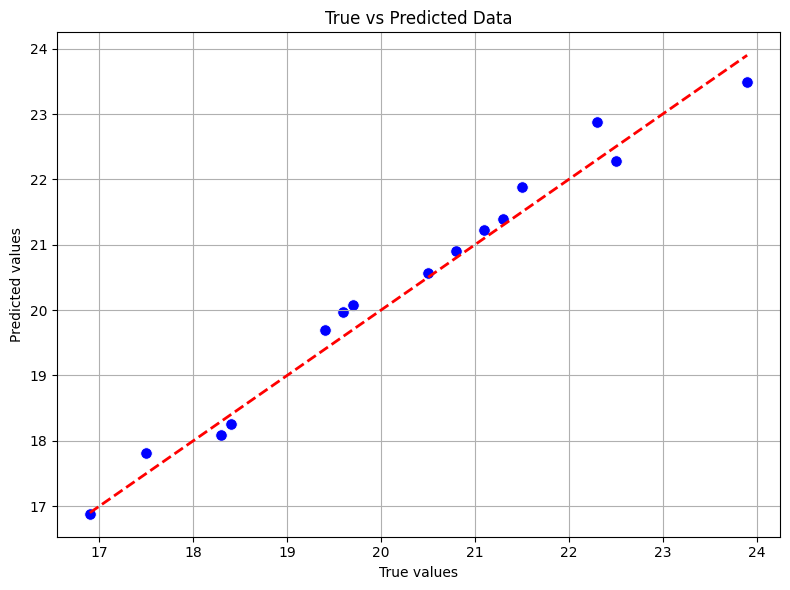

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor='w', s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs Predicted Data")
plt.grid(True)
plt.tight_layout()
plt.show()